# Import data

In [1]:
import time
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
print("Loading data file now, this could take a while depending on file size")
start = time.time()
df = pd.read_csv("train.csv")  # ADD-CSV
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds\n")
print("Number of rows : ", df.shape[0], " and the number of columns : ", df.shape[1])
missing_values = df.isna().sum().sum()
duplicated_values = df.duplicated().sum()
print(f"\nMissing values: {missing_values}")
print(f"Duplicated values: {duplicated_values}")
if missing_values >= 1:
    print("\nMissing values by column:")
    print(df.isna().sum())
print("\nUnique Values in Each Column:")
print(df.nunique())

Loading data file now, this could take a while depending on file size
Loading took 0.42 seconds

Number of rows :  223084  and the number of columns :  20

Missing values: 45671
Duplicated values: 0

Missing values by column:
ID                                            0
History of HeartDisease or Attack          1694
High Blood Pressure                           0
Told High Cholesterol                     32186
Cholesterol Checked                           0
Body Mass Index                           11782
Smoked 100+ Cigarettes                        1
Diagnosed Stroke                              0
Diagnosed Diabetes                            3
Leisure Physical Activity                     0
Heavy Alcohol Consumption                     0
Health Care Coverage                          0
Doctor Visit Cost Barrier                     1
General Health                                1
Difficulty Walking                            3
Sex                                           0
Educat

In [ ]:
df = df.dropna(subset=["History of HeartDisease or Attack"]) # ไม่มีก็ไม่เอา

In [ ]:
df.rename( # เปลี่ยนชื่อ
    columns={
        "History of HeartDisease or Attack": "HeartDisease",
        "High Blood Pressure": "BloodPressure",
        "Told High Cholesterol": "High_Cholesterol",
        "Cholesterol Checked": "Cholesterol_Checked",
        "Body Mass Index": "BMI",
        "Smoked 100+ Cigarettes": "Smoked",
        "Diagnosed Stroke": "Stroke",
        "Diagnosed Diabetes": "Diabetes",
        "Leisure Physical Activity": "Exercise_Activity",
        "Vegetable or Fruit Intake (1+ per Day)": "Fruit_Intake",
        "Heavy Alcohol Consumption": "Alcohol_Consumption",
        "Health Care Coverage": "Health_Care",
        "Doctor Visit Cost Barrier": "Doctor_Visit_Cost_Barrier",
        "General Health": "General_Health",
        "Difficulty Walking": "Difficulty_Walking",
        "Sex": "Sex",
        "Age": "Age",
        "Education Level": "Education",
        "Income Level": "Income",
    },
    inplace=True,
)

In [4]:
numerical_columns = df.select_dtypes(
    include=["int16", "int32", "int64", "float16", "float32", "float64"]
).columns.tolist()
non_numerical_columns = df.select_dtypes(include=["object"]).columns.tolist()

print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['BMI', 'Age']
Categorical Columns: ['ID', 'HeartDisease', 'BloodPressure', 'High_Cholesterol', 'Cholesterol_Checked', 'Smoked', 'Stroke', 'Diabetes', 'Exercise_Activity', 'Alcohol_Consumption', 'Health_Care', 'Doctor_Visit_Cost_Barrier', 'General_Health', 'Difficulty_Walking', 'Sex', 'Education', 'Income', 'Fruit_Intake']


# Analysis

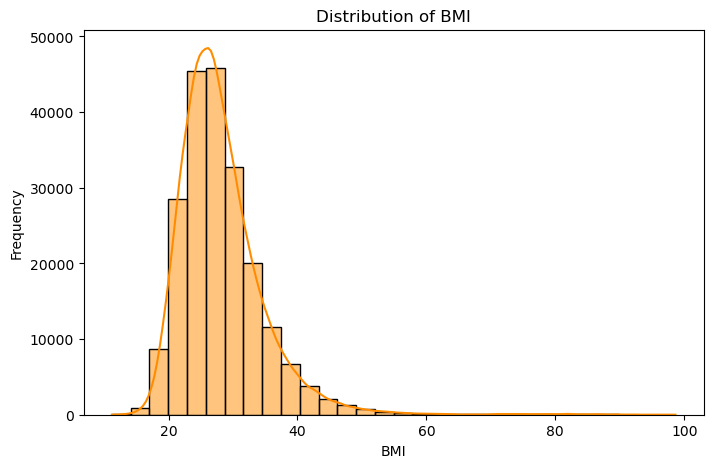

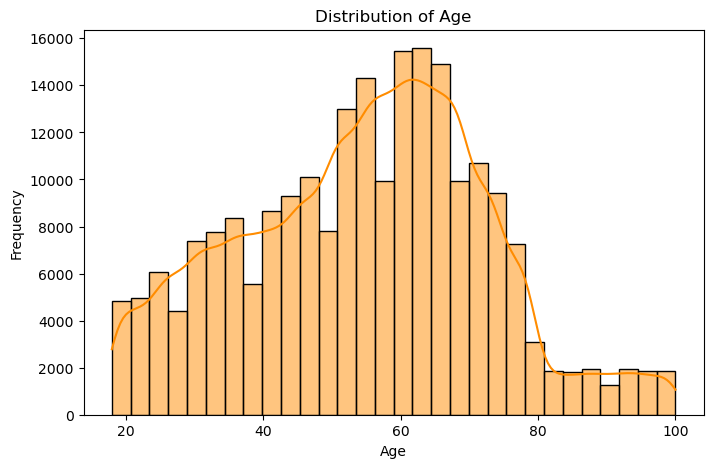

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_histograms(df, numerical_columns):
    for column in numerical_columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[column], bins=30, kde=True, color="#ff8c00")
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()


numerical_columns = ["BMI", "Age"]
plot_histograms(df, numerical_columns)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_categorical_distributions(Categorical_Columns, data=df, palette="muted"):
    plt.figure(figsize=(15, 6))

    for i, column_name in enumerate(Categorical_Columns):
        plt.subplot(1, 3, i + 1)
        value_counts = data[column_name].value_counts()
        value_counts.plot.pie(
            autopct="%1.1f%%",
            colors=sns.color_palette(palette),
            startangle=90,
            explode=[0.05] * value_counts.nunique(),
        )
        plt.title(f"Percentage Distribution of {column_name}")
        plt.ylabel("")
    plt.tight_layout()
    plt.show()
    print(data[Categorical_Columns].value_counts())

In [ ]:
import pandas as pd
import numpy as np
import re #re จำไม่ได้นิ 


# def parse_income_range(text):
#     text = text.strip()
#     text = text.lstrip("(")

#     m = re.match(r"^\$([\d,]+)\s+or\s+more", text, re.IGNORECASE)
#     if m:
#         income_min = int(m.group(1).replace(",", ""))
#         income_max = 75000  # ไม่รู้อ่ะ เอาเท่านั้นไปแล้วกัน
#         return pd.Series([income_min, income_max])

#     m = re.match(r"^\$([\d,]+)\s+to\s+(?:less than\s+)?\$([\d,]+)", text, re.IGNORECASE)
#     if m:
#         income_min = int(m.group(1).replace(",", ""))
#         income_max = int(m.group(2).replace(",", ""))
#         return pd.Series([income_min, income_max])

#     m = re.match(r"^Less\s+than\s+\$([\d,]+)", text, re.IGNORECASE)
#     if m:
#         income_min = 3600  # เงินรายชั่วโมงขั้นต่ำ 15 $ ต่อชั่วโมง 15 * 8 * 30
#         income_max = int(m.group(1).replace(",", ""))
#         return pd.Series([income_min, income_max])

#     return pd.Series([3600, 10000])


# df[["income_min", "income_max"]] = df["Income"].apply(parse_income_range)

# print(df[["Income", "income_min", "income_max"]].head())


df = df.drop(columns=["Income", "ID"]) # แยกรายได้แต่ไม่รู้เอาไปทำอะไรต่อ ตัดออก

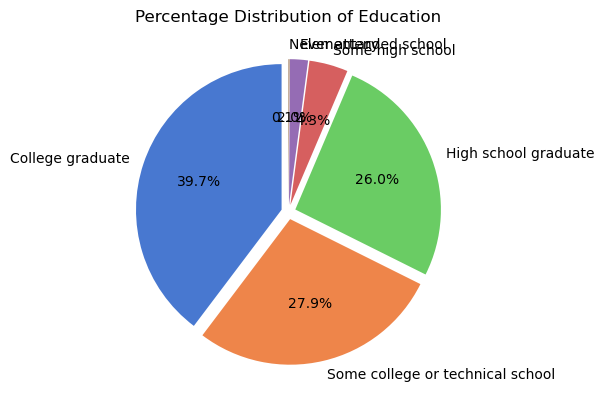

Education                       
College graduate                    87903
Some college or technical school    61833
High school graduate                57491
Some high school                     9522
Elementary                           4404
Never attended school                 237
Name: count, dtype: int64


In [8]:
columns_to_plot = ["Education"]
plot_categorical_distributions(columns_to_plot)

In [ ]:
df["Education"] = df["Education"].replace(
    {
        "Some college or technical school": "technical school",
        "Some high school": "High school graduate", # แล้ววววว มันก็ High school น่าจะน่ะ รวมๆกันไป
    }
)

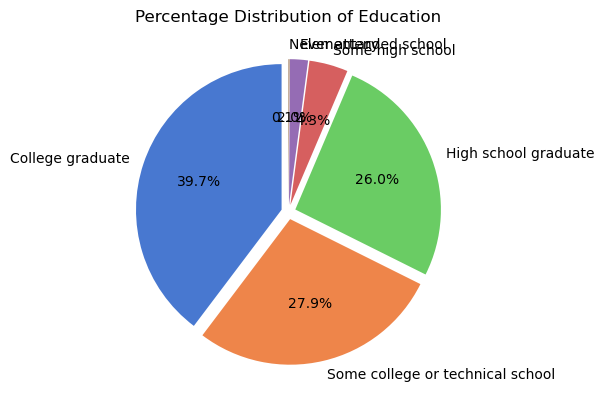

Education                       
College graduate                    87903
Some college or technical school    61833
High school graduate                57491
Some high school                     9522
Elementary                           4404
Never attended school                 237
Name: count, dtype: int64


In [10]:
columns_to_plot = ["Education"]
plot_categorical_distributions(columns_to_plot)

In [ ]:
df["Smoked"] = df["Smoked"].fillna(df["Smoked"].mode()[0])
df["Diabetes"] = df["Diabetes"].fillna(df["Diabetes"].mode()[0])
df["Doctor_Visit_Cost_Barrier"] = df["Doctor_Visit_Cost_Barrier"].fillna(
    df["Doctor_Visit_Cost_Barrier"].mode()[0]
)
df["General_Health"] = df["General_Health"].fillna(df["General_Health"].mode()[0])
df["Difficulty_Walking"] = df["Difficulty_Walking"].fillna(
    df["Difficulty_Walking"].mode()[0]
)
df["High_Cholesterol"] = df["High_Cholesterol"].fillna(df["High_Cholesterol"].mode()[0])

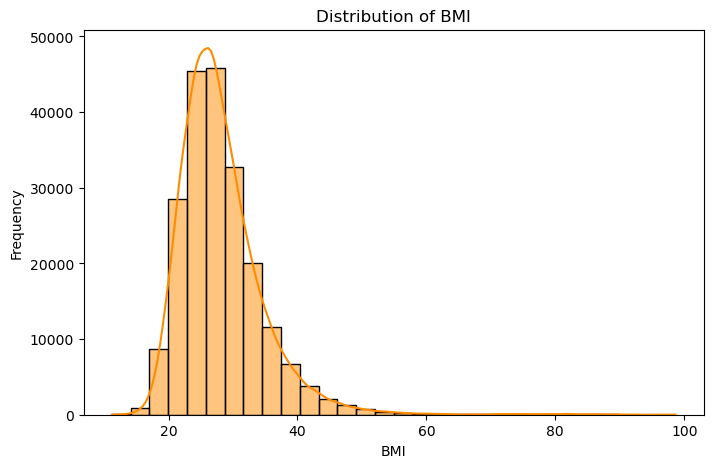

In [ ]:
import numpy as np

df["BMI"] = df["BMI"].apply(
    lambda x: np.random.uniform(18, 26) if np.isnan(x) else x
)  # ระหว่าง 16.50 - 22.90 จากรูป มันน่าจะอยู่แถบๆ 18 - 30 มั้งน่ะ

In [14]:
def categorize_BMI(row):
    if row["Sex"] == "Male":
        if row["BMI"] < 18.5:
            return 0  # Underweight
        elif 18.5 <= row["BMI"] <= 24.9:
            return 0  # Normal weight
        elif 25 <= row["BMI"] <= 29.9:
            return 1  # Overweight
        elif 30 <= row["BMI"] <= 34.9:
            return 2  # Obese class I
        elif 35 <= row["BMI"] <= 39.9:
            return 3  # Obese class II
        else:
            return 4  # Obese class III
    else:
        if row["BMI"] < 18.5:
            return 0  # Underweight
        elif 18.5 <= row["BMI"] <= 23.9:
            return 0  # Normal weight
        elif 24 <= row["BMI"] <= 28.9:
            return 1  # Overweight
        elif 29 <= row["BMI"] <= 34.9:
            return 2  # Obese class I
        elif 35 <= row["BMI"] <= 39.9:
            return 3  # Obese class II
        else:
            return 4  # Obese class III


df["BMI Category"] = df.apply(categorize_BMI, axis=1)

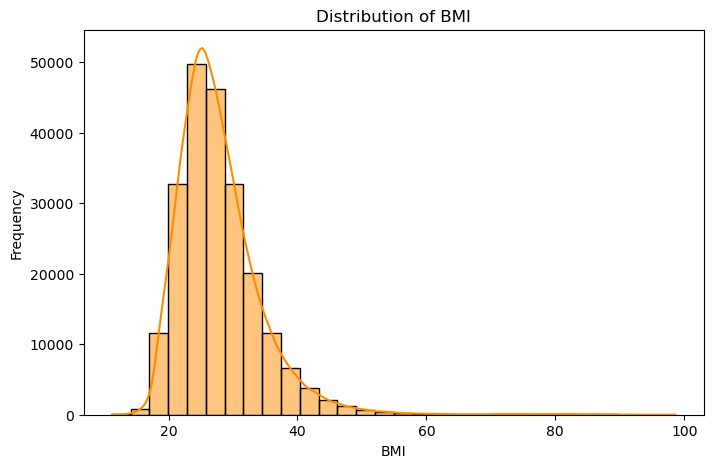

In [15]:
numerical_columns = ["BMI"]
plot_histograms(df, numerical_columns)

In [111]:
no_data = df[df["HeartDisease"] == "No"]
yes_data = df[df["HeartDisease"] == "Yes"]

In [112]:
no_data_sampled = no_data.sample(n=25000, random_state=42)

In [113]:
balanced_df = pd.concat([no_data_sampled, yes_data])

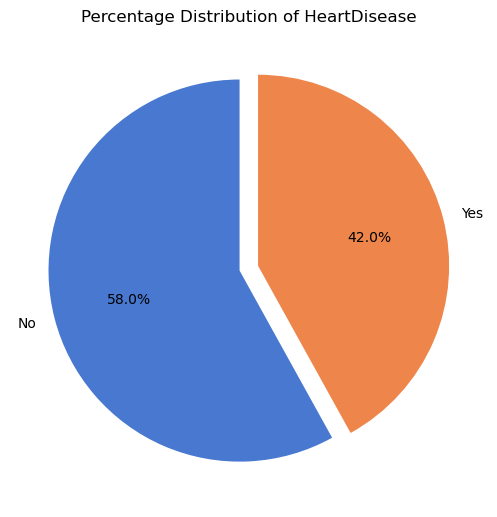

HeartDisease
No              25000
Yes             18068
Name: count, dtype: int64


In [114]:
columns_to_plot = ["HeartDisease"]
plot_categorical_distributions(columns_to_plot, data=balanced_df)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [116]:
encoder = LabelEncoder()

label_mappings = {}

for col in balanced_df.select_dtypes("object"):
    balanced_df[col] = encoder.fit_transform(balanced_df[col])
    label_mappings[col] = dict(
        zip(encoder.classes_, encoder.transform(encoder.classes_))
    )

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: HeartDisease
0 -> No
1 -> Yes

Column: BloodPressure
0 -> No
1 -> Yes

Column: High_Cholesterol
0 -> No
1 -> Yes

Column: Cholesterol_Checked
0 -> No
1 -> Yes

Column: Smoked
0 -> No
1 -> Yes

Column: Stroke
0 -> No
1 -> Yes

Column: Diabetes
0 -> No
1 -> Yes

Column: Exercise_Activity
0 -> No
1 -> Yes

Column: Alcohol_Consumption
0 -> No
1 -> Yes

Column: Health_Care
0 -> No
1 -> Yes

Column: Doctor_Visit_Cost_Barrier
0 -> No
1 -> Yes

Column: General_Health
0 -> Excellent
1 -> Fair
2 -> Good
3 -> Poor
4 -> Very Poor

Column: Difficulty_Walking
0 -> No
1 -> Yes

Column: Sex
0 -> Female
1 -> Male

Column: Education
0 -> College graduate
1 -> Elementary
2 -> High school graduate
3 -> Never attended school
4 -> technical school

Column: Fruit_Intake
0 -> No
1 -> Yes



In [117]:
df["Education"] = df["Education"].replace(
    {0: 0, 1: 3, 2: 1, 3: 4, 4: 2}  # ไล่จาก ดีสุด = 0 ไล่มาถึง 4
)

In [118]:
bins = [10, 30, 40, 50, 60, 80, 100, 120]
labels = [1, 2, 3, 4, 5, 6, 7]

balanced_df["Age Group"] = pd.cut(
    balanced_df["Age"], bins=bins, labels=labels, right=False
)
balanced_df["Age Group"] = balanced_df["Age Group"].astype(int)

In [ ]:
# Basic Feature - BMI x Age
balanced_df["BMIxAge"] = balanced_df["BMI"] * balanced_df["Age"]

# Disease Combination Features
balanced_df["HighBloodPressure_Diabetes_Stroke"] = (
    balanced_df["BloodPressure"] + balanced_df["Diabetes"] + balanced_df["Stroke"]
).apply(lambda x: 0 if x == 0 else 1)

balanced_df["HighBloodPressure_Cholesterol_Smoked"] = (
    balanced_df["BloodPressure"] + balanced_df["High_Cholesterol"] + balanced_df["Smoked"]
).apply(lambda x: 0 if x == 0 else 1)

balanced_df["HighBloodPressure_Stroke_Smoked"] = (
    balanced_df["BloodPressure"] + balanced_df["Stroke"] + balanced_df["Smoked"]
).apply(lambda x: 0 if x == 0 else 1)

balanced_df["High_Cholesterol_Alcohol_Smoked"] = (
    balanced_df["High_Cholesterol"] + balanced_df["Alcohol_Consumption"] + balanced_df["Smoked"]
).apply(lambda x: 0 if x == 0 else 1)

balanced_df["Diabetes_Smoked_Alcohol"] = (
    balanced_df["Diabetes"] * balanced_df["Smoked"] * balanced_df["Alcohol_Consumption"]
).apply(lambda x: 0 if x == 0 else 1)

balanced_df["Diabetes_Smoked_Cholesterol"] = (
    balanced_df["Diabetes"] + balanced_df["High_Cholesterol"] + balanced_df["Smoked"]
).apply(lambda x: 0 if x == 0 else 1)

# Risk Score Features
balanced_df["BMIxAge_Risk"] = (
    balanced_df["BMIxAge"] * (balanced_df["BloodPressure"] + balanced_df["Diabetes"] + balanced_df["Stroke"])
).apply(lambda x: 0 if x == 0 else 1)

balanced_df["BMI_Category_Disease"] = (
    balanced_df["BMI Category"] * 
    (
        balanced_df["BloodPressure"] +balanced_df["Diabetes"] +balanced_df["High_Cholesterol"] +balanced_df["Stroke"]
    )
).apply(lambda x: 0 if x == 0 else 1)

balanced_df["HealthRisk_Score"] = (
    balanced_df["BloodPressure"] +
    balanced_df["High_Cholesterol"] +
    balanced_df["Stroke"] +
    balanced_df["Diabetes"] +
    balanced_df["Smoked"] +
    balanced_df["Alcohol_Consumption"]
).apply(lambda x: 0 if x == 0 else 1)

# Health Index Features
balanced_df["Exercise_Health_Index"] = balanced_df["Exercise_Activity"] * (balanced_df["General_Health"] + balanced_df["Fruit_Intake"])

balanced_df["Total_Risk_Factors"] = (
    balanced_df["BloodPressure"] +
    balanced_df["High_Cholesterol"] +
    balanced_df["Stroke"] +
    balanced_df["Diabetes"] +
    balanced_df["Smoked"] +
    balanced_df["Alcohol_Consumption"] +
    balanced_df["Difficulty_Walking"]
).apply(lambda x: 0 if x == 0 else 1)

balanced_df["Total_Health_Factors"] = (
    balanced_df["Exercise_Activity"] +
    balanced_df["Fruit_Intake"] +
    (4 - balanced_df["General_Health"])
)

# Ratio and Complex Features
balanced_df["Health_to_Risk_Ratio"] = balanced_df["Total_Health_Factors"] / (balanced_df["Total_Risk_Factors"] + 1)

balanced_df["Severe_Disease_Factor"] = balanced_df["Stroke"] + balanced_df["Diabetes"]

balanced_df["BMI_Risk_Score"] = balanced_df["BMI"] * balanced_df["Total_Risk_Factors"]
balanced_df["BMI_Health_Score"] = balanced_df["BMI"] * balanced_df["Total_Health_Factors"]
balanced_df["BMIxAge_Health"] = balanced_df["BMIxAge"] / (balanced_df["Total_Health_Factors"] + 1)

balanced_df["HealthRisk_Ratio"] = balanced_df["HealthRisk_Score"] / (balanced_df["Total_Health_Factors"] + 1)

In [120]:
balanced_df.keys()

Index(['HeartDisease', 'BloodPressure', 'High_Cholesterol',
       'Cholesterol_Checked', 'BMI', 'Smoked', 'Stroke', 'Diabetes',
       'Exercise_Activity', 'Alcohol_Consumption', 'Health_Care',
       'Doctor_Visit_Cost_Barrier', 'General_Health', 'Difficulty_Walking',
       'Sex', 'Education', 'Age', 'Fruit_Intake', 'BMI Category', 'Age Group',
       'BMIxAge', 'HighBloodPressure_Diabetes_Stroke',
       'HighBloodPressure_Cholesterol_Smoked',
       'HighBloodPressure_Stroke_Smoked', 'High_Cholesterol_Alcohol_Smoked',
       'Diabetes_Smoked_Alcohol', 'BMIxAge_Risk', 'BMI_Category_Disease',
       'Diabetes_Smoked_Cholesterol', 'HealthRisk_Score',
       'Exercise_Health_Index', 'Total_Risk_Factors', 'Total_Health_Factors',
       'Health_to_Risk_Ratio', 'Severe_Disease_Factor', 'BMI_Risk_Score',
       'BMI_Health_Score', 'BMIxAge_Health', 'BMI_squared', 'Age_squared',
       'BMIxAge_squared', 'HealthRisk_Score_squared',
       'Healthy_Lifestyle_Score_squared', 'BMI_log', 'Age_

In [ ]:
selected_features_filtered = [
    #Lable
    "HeartDisease",
    
    # Health Conditions
    "Stroke",
    "Diabetes",
    "Smoked",

    # Vital Signs and Indicators
    "BloodPressure",
    "High_Cholesterol",
    "Cholesterol_Checked",
    "BMI",

    # Health Factors and Lifestyle
    "Exercise_Activity",
    "General_Health",
    "Sex",  
    "Age",  

    # Derived or Calculated Features
    "BMI Category",
    "Age Group",
    "BMIxAge",
    "BMIxAge_Risk",
    "BMI_Category_Disease",

    # Health Risk Scores
    "HealthRisk_Score",
    "Total_Risk_Factors",
    "Total_Health_Factors",
    "Health_to_Risk_Ratio",
    "BMI_Risk_Score",
    "BMI_Health_Score",
    "HealthRisk_Ratio",
]


In [122]:
balanced_df = balanced_df[selected_features_filtered]

# train_test_split

In [123]:
from sklearn.model_selection import train_test_split

X = balanced_df.drop("HeartDisease", axis=1)
y = balanced_df["HeartDisease"]

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(34454, 23) (8614, 23)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier


## ใช้ GridSearchCV หามา

In [126]:
models = {
    "Random Forest": RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=200, random_state=42),
    "CatBoost": CatBoostClassifier(depth=6, iterations=200, learning_rate=0.05, random_state=42),
    "Naïve Bayes": GaussianNB(),
    "Extra Trees": ExtraTreesClassifier(max_depth=20, n_estimators=300, random_state=42),
    "AdaBoost": AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(C=0.1, max_iter=100, solver='newton-cg', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance'),
    "MLP Classifier": MLPClassifier(activation='relu', hidden_layer_sizes=(100, 100), learning_rate='constant',max_iter = 300, solver='adam', random_state=42),
    "Quadratic Discriminant Analysis (QDA)": QuadraticDiscriminantAnalysis(reg_param=0.1),
    "Ridge Classifier": RidgeClassifier(alpha=0.1),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, random_state=42)
}

In [127]:
Train_df = balanced_df[['HeartDisease']].copy()

In [ ]:
for model_name, model in models.items():
    model.fit(X_train, y_train)  # เทรนข้อมูล 18000 + 20000
    pred = model.predict(X)
    Train_df[f"{model_name[:3]}_pred"] = pred

0:	learn: 0.6682648	total: 12.3ms	remaining: 2.46s
1:	learn: 0.6463930	total: 22.7ms	remaining: 2.24s
2:	learn: 0.6277585	total: 31.3ms	remaining: 2.06s
3:	learn: 0.6106016	total: 39.6ms	remaining: 1.94s
4:	learn: 0.5956029	total: 48.6ms	remaining: 1.89s
5:	learn: 0.5825024	total: 58.2ms	remaining: 1.88s
6:	learn: 0.5708720	total: 67.4ms	remaining: 1.86s
7:	learn: 0.5603096	total: 76.8ms	remaining: 1.84s
8:	learn: 0.5512308	total: 88.3ms	remaining: 1.87s
9:	learn: 0.5433165	total: 98.5ms	remaining: 1.87s
10:	learn: 0.5358652	total: 108ms	remaining: 1.86s
11:	learn: 0.5296168	total: 119ms	remaining: 1.86s
12:	learn: 0.5241979	total: 128ms	remaining: 1.84s
13:	learn: 0.5188602	total: 138ms	remaining: 1.83s
14:	learn: 0.5140904	total: 148ms	remaining: 1.83s
15:	learn: 0.5102765	total: 159ms	remaining: 1.82s
16:	learn: 0.5061884	total: 168ms	remaining: 1.81s
17:	learn: 0.5029681	total: 179ms	remaining: 1.81s
18:	learn: 0.4998535	total: 189ms	remaining: 1.8s
19:	learn: 0.4968765	total: 199m

In [130]:
Train_df.keys()

Index(['HeartDisease', 'Ran_pred', 'Gra_pred', 'XGB_pred', 'Cat_pred',
       'Naï_pred', 'Ext_pred', 'Ada_pred', 'Log_pred', 'K-N_pred', 'MLP_pred',
       'Qua_pred', 'Rid_pred', 'Dec_pred'],
      dtype='object')

In [ ]:
model_columns = ['Ran_pred', 'Gra_pred', 'XGB_pred', 'Cat_pred', 'Naï_pred', 'Ext_pred', 'Ada_pred', 'Log_pred', 'K-N_pred', 'MLP_pred','Qua_pred', 'Rid_pred', 'Dec_pred']
Train_df['avg_pred'] = Train_df[model_columns].mean(axis=1)
Train_df['final_pred'] = Train_df['avg_pred'].apply(lambda x: 1 if x > 0.65 else 0) # น่าจะได้ 0.65 น่าจะดี ให้มั่นใจๆหน่อย

## หาค่าที่ตรงที่สุด 2 วิธี 1.ค่าเฉลี่ย 2.XGB

In [36]:
# Train_df = Train_df[['HeartDisease', 'final_pred']]
# Train_df

Classification Report:
F1 Score for class 0: 0.8310231928950929
Precision for class 0: 0.8149344407274964
Recall for class 0: 0.84776
F1 Score for class 1: 0.7546471576190612
Precision for class 1: 0.7769181173436492
Recall for class 1: 0.7336174452069958
F2 Score for class 0: 0.8409850246414883
F2 Score for class 1: 0.741887096593644
Classification Accuracy: 0.7998746168849261
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83     25000
           1       0.78      0.73      0.75     18068

    accuracy                           0.80     43068
   macro avg       0.80      0.79      0.79     43068
weighted avg       0.80      0.80      0.80     43068



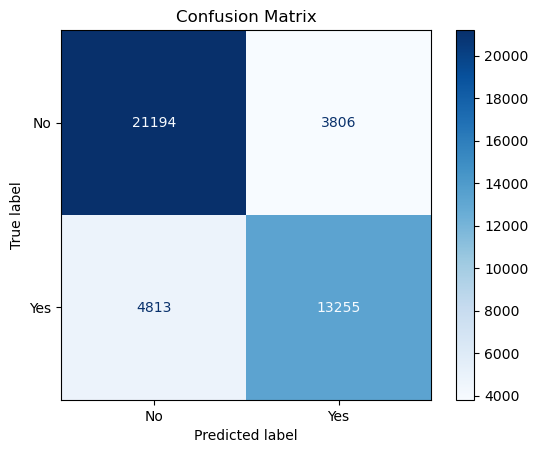

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_true = Train_df['HeartDisease']  
y_pred = Train_df['final_pred']


report = classification_report(y_true, y_pred, output_dict=True)
print("=="*30)
print("Classification Report:")
print("F1 Score for class 0:", report['0']['f1-score'])
print("Precision for class 0:", report['0']['precision'])
print("Recall for class 0:", report['0']['recall'])
print("=="*30)
print("F1 Score for class 1:", report['1']['f1-score'])
print("Precision for class 1:", report['1']['precision'])
print("Recall for class 1:", report['1']['recall'])
print("=="*30)
f2_class_0 = (5 * report['0']['precision'] * report['0']['recall']) / (4 * report['0']['precision'] + report['0']['recall'])
f2_class_1 = (5 * report['1']['precision'] * report['1']['recall']) / (4 * report['1']['precision'] + report['1']['recall'])

print("F2 Score for class 0:", f2_class_0)
print("F2 Score for class 1:", f2_class_1)
print("=="*30)
print("Classification Accuracy:", accuracy_score(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


## Model

In [318]:
X_Features = Train_df.drop(["HeartDisease"], axis=1)
y_Features = Train_df['HeartDisease']

In [319]:
X_train_lable, X_test_lable, y_train_lable, y_test_lable = train_test_split(X_Features, y_Features, test_size=0.2)
print(X_train_lable.shape, X_test_lable.shape)

(34454, 15) (8614, 15)


In [320]:
y_train_lable

203403    0
184807    1
45472     0
124689    1
103465    0
         ..
184688    1
203031    0
2728      0
180875    0
116788    0
Name: HeartDisease, Length: 34454, dtype: int32

In [321]:
rf_param_grid = {
    "n_estimators": [10, 50, 100, 200, 300, 400, 500],
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False]
}

In [322]:
from sklearn.model_selection import RandomizedSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
rf = RandomForestClassifier(random_state=0)

random_search = RandomizedSearchCV(
    rf,  
    param_distributions=rf_param_grid,  
    cv=cv,  
    scoring="accuracy",
    n_iter=100,  
    verbose=2,  
    n_jobs=-1  
)

In [323]:
random_search.fit(X_train_lable, y_train_lable)

print("Best Params:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Params: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}
Best Score: 0.9439252182912906


In [ ]:
Params = {
    "n_estimators": 400,
    "min_samples_split": 10,
    "min_samples_leaf": 4,
    "max_features": "log2",
    "max_depth": 10,
    "bootstrap": False,
}

In [ ]:
rf = RandomForestClassifier(**Params)
rf.fit(X_train_lable, y_train_lable)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=400)

In [330]:
y_pred_class = rf.predict(X_test_lable)

In [331]:
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score

def evaluate_model(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    f2 = fbeta_score(y_true, y_pred, beta=2)

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"F2 Score: {f2:.4f}")

evaluate_model(y_test_lable, y_pred_class)

Precision: 0.9243
Recall: 0.9376
F1 Score: 0.9309
F2 Score: 0.9349


Classification Accuracy: 0.9414905967030416
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      4994
           1       0.92      0.94      0.93      3620

    accuracy                           0.94      8614
   macro avg       0.94      0.94      0.94      8614
weighted avg       0.94      0.94      0.94      8614



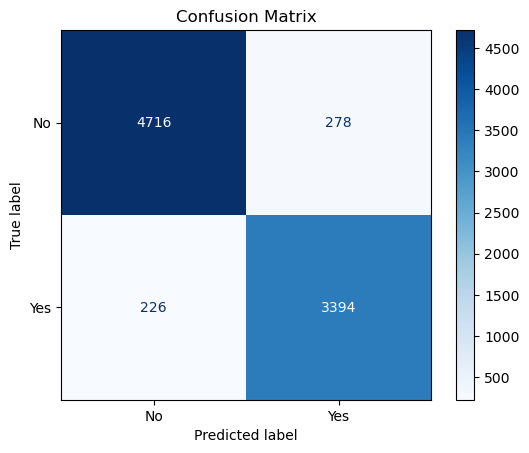

In [332]:
print("Classification Accuracy:", accuracy_score(y_test_lable, y_pred_class))
print("Classification Report:\n", classification_report(y_test_lable, y_pred_class))

cm = confusion_matrix(y_test_lable, y_pred_class)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## import Test data

In [255]:
print("Loading data file now, this could take a while depending on file size")
start = time.time()
df_test = pd.read_csv("test.csv")  # ADD-CSV
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds\n")
print(
    "Number of rows : ",
    df_test.shape[0],
    " and the number of columns : ",
    df_test.shape[1],
)
missing_values = df_test.isna().sum().sum()
duplicated_values = df_test.duplicated().sum()
print(f"\nMissing values: {missing_values}")
print(f"Duplicated values: {duplicated_values}")
if missing_values >= 1:
    print("\nMissing values by column:")
    print(df_test.isna().sum())
print("\nUnique Values in Each Column:")
print(df_test.nunique())

Loading data file now, this could take a while depending on file size
Loading took 0.2 seconds

Number of rows :  74361  and the number of columns :  19

Missing values: 0
Duplicated values: 0

Unique Values in Each Column:
ID                                        74361
High Blood Pressure                           2
Told High Cholesterol                         2
Cholesterol Checked                           2
Body Mass Index                            3921
Smoked 100+ Cigarettes                        2
Diagnosed Stroke                              2
Diagnosed Diabetes                            2
Leisure Physical Activity                     2
Heavy Alcohol Consumption                     2
Health Care Coverage                          2
Doctor Visit Cost Barrier                     2
General Health                                5
Difficulty Walking                            2
Sex                                           2
Education Level                               6
Income L

In [256]:
df_test.rename(
    columns={
        "History of HeartDisease or Attack": "HeartDisease",
        "High Blood Pressure": "BloodPressure",
        "Told High Cholesterol": "High_Cholesterol",
        "Cholesterol Checked": "Cholesterol_Checked",
        "Body Mass Index": "BMI",
        "Smoked 100+ Cigarettes": "Smoked",
        "Diagnosed Stroke": "Stroke",
        "Diagnosed Diabetes": "Diabetes",
        "Leisure Physical Activity": "Exercise_Activity",
        "Vegetable or Fruit Intake (1+ per Day)": "Fruit_Intake",
        "Heavy Alcohol Consumption": "Alcohol_Consumption",
        "Health Care Coverage": "Health_Care",
        "Doctor Visit Cost Barrier": "Doctor_Visit_Cost_Barrier",
        "General Health": "General_Health",
        "Difficulty Walking": "Difficulty_Walking",
        "Sex": "Sex",
        "Age": "Age",
        "Education Level": "Education",
        "Income Level": "Income",
    },
    inplace=True,
)

In [257]:
import pandas as pd
import re


def parse_income_range(text):
    text = text.strip()
    text = text.lstrip("(")

    m = re.match(r"^\$([\d,]+)\s+or\s+more", text, re.IGNORECASE)
    if m:
        income_min = int(m.group(1).replace(",", ""))
        income_max = 75000
        return pd.Series([income_min, income_max])

    m = re.match(r"^\$([\d,]+)\s+to\s+(?:less than\s+)?\$([\d,]+)", text, re.IGNORECASE)
    if m:
        income_min = int(m.group(1).replace(",", ""))
        income_max = int(m.group(2).replace(",", ""))
        return pd.Series([income_min, income_max])

    m = re.match(r"^Less\s+than\s+\$([\d,]+)", text, re.IGNORECASE)
    if m:
        income_min = 3600  # เงินรายชั่วโมงขั้นต่ำ 15 $ ต่อชั่วโมง 15 * 8 * 30
        income_max = int(m.group(1).replace(",", ""))
        return pd.Series([income_min, income_max])

    return pd.Series([3600, 10000])


df_test[["income_min", "income_max"]] = df_test["Income"].apply(parse_income_range)

print(df_test[["Income", "income_min", "income_max"]].head())
df_test = df_test.drop(columns=["Income", "ID"])

                         Income  income_min  income_max
0  $20,000 to less than $25,000       20000       25000
1  $50,000 to less than $75,000       50000       75000
2             Less than $10,000        3600       10000
3  $50,000 to less than $75,000       50000       75000
4  $25,000 to less than $35,000       25000       35000


In [258]:
df_test["Education"] = df_test["Education"].replace(
    {
        "Some college or technical school": "technical school",
        "Some high school": "High school graduate",
    }
)

In [259]:
def categorize_BMI(row):
    if row["Sex"] == "Male":
        if row["BMI"] < 18.5:
            return 0  # Underweight
        elif 18.5 <= row["BMI"] <= 24.9:
            return 0  # Normal weight
        elif 25 <= row["BMI"] <= 29.9:
            return 1  # Overweight
        elif 30 <= row["BMI"] <= 34.9:
            return 2  # Obese class I
        elif 35 <= row["BMI"] <= 39.9:
            return 3  # Obese class II
        else:
            return 4  # Obese class III
    else:
        if row["BMI"] < 18.5:
            return 0  # Underweight
        elif 18.5 <= row["BMI"] <= 23.9:
            return 0  # Normal weight
        elif 24 <= row["BMI"] <= 28.9:
            return 1  # Overweight
        elif 29 <= row["BMI"] <= 34.9:
            return 2  # Obese class I
        elif 35 <= row["BMI"] <= 39.9:
            return 3  # Obese class II
        else:
            return 4  # Obese class III


df_test["BMI Category"] = df_test.apply(categorize_BMI, axis=1)

In [260]:
encoder = LabelEncoder()

label_mappings = {}

for col in df_test.select_dtypes("object"):
    df_test[col] = encoder.fit_transform(df_test[col])
    label_mappings[col] = dict(
        zip(encoder.classes_, encoder.transform(encoder.classes_))
    )

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: BloodPressure
0 -> No
1 -> Yes

Column: High_Cholesterol
0 -> No
1 -> Yes

Column: Cholesterol_Checked
0 -> No
1 -> Yes

Column: Smoked
0 -> No
1 -> Yes

Column: Stroke
0 -> No
1 -> Yes

Column: Diabetes
0 -> No
1 -> Yes

Column: Exercise_Activity
0 -> No
1 -> Yes

Column: Alcohol_Consumption
0 -> No
1 -> Yes

Column: Health_Care
0 -> No
1 -> Yes

Column: Doctor_Visit_Cost_Barrier
0 -> No
1 -> Yes

Column: General_Health
0 -> Excellent
1 -> Fair
2 -> Good
3 -> Poor
4 -> Very Poor

Column: Difficulty_Walking
0 -> No
1 -> Yes

Column: Sex
0 -> Female
1 -> Male

Column: Education
0 -> College graduate
1 -> Elementary
2 -> High school graduate
3 -> Never attended school
4 -> technical school

Column: Fruit_Intake
0 -> No
1 -> Yes



In [261]:
df_test["Education"] = df_test["Education"].replace(
    {0: 0, 1: 3, 2: 1, 3: 4, 4: 2}  # ไล่จาก ดีสุด = 0 ไล่มาถึง 4
)

In [262]:
bins = [10, 30, 40, 50, 60, 80, 100, 120]
labels = [1, 2, 3, 4, 5, 6, 7]

df_test["Age Group"] = pd.cut(
    df_test["Age"], bins=bins, labels=labels, right=False
)
df_test["Age Group"] = df_test["Age Group"].astype(int)

In [263]:
df_test["BMIxAge"] = df_test["BMI"] * df_test["Age"]

# การคำนวณปัจจัยความเสี่ยงต่างๆ โดยใช้การตั้งค่าที่ 0 = สุขภาพดี และมากกว่า 0 = มีความเสี่ยง
df_test["HighBloodPressure_Diabetes_Stroke"] = ((df_test["BloodPressure"] + df_test["Diabetes"] + df_test["Stroke"]).apply(lambda x: 0 if x == 0 else 1)  # = ไม่มีความเสี่ยง0 
)
df_test["HighBloodPressure_Cholesterol_Smoked"] = ((df_test["BloodPressure"] + df_test["High_Cholesterol"] + df_test["Smoked"]).apply(lambda x: 0 if x == 0 else 1)
)
df_test["HighBloodPressure_Stroke_Smoked"] = ((df_test["BloodPressure"] + df_test["Stroke"] + df_test["Smoked"]).apply(lambda x: 0 if x == 0 else 1)
)
df_test["High_Cholesterol_Alcohol_Smoked"] = ((df_test["High_Cholesterol"] + df_test["Alcohol_Consumption"] + df_test["Smoked"]).apply(lambda x: 0 if x == 0 else 1)
)
df_test["Diabetes_Smoked_Alcohol"] = ((df_test["Diabetes"] * df_test["Smoked"] * df_test["Alcohol_Consumption"]).apply(lambda x: 0 if x == 0 else 1)
)

# BMIxAge_Risk ใหม่
df_test["BMIxAge_Risk"] = (df_test["BMIxAge"] * (df_test["BloodPressure"] + df_test["Diabetes"] + df_test["Stroke"])
).apply(lambda x: 0 if x == 0 else 1)

# BMI Category with Disease ใหม่
df_test["BMI_Category_Disease"] = (df_test["BMI Category"] * (df_test["BloodPressure"] + df_test["Diabetes"]   + df_test["High_Cholesterol"] + df_test["Stroke"])
).apply(lambda x: 0 if x == 0 else 1)

# Diabetes_Smoked_Cholesterol ใหม่
df_test["Diabetes_Smoked_Cholesterol"] = ((df_test["Diabetes"] + df_test["High_Cholesterol"] + df_test["Smoked"]).apply(lambda x: 0 if x == 0 else 1)
)

# HealthRisk_Score ใหม่
df_test["HealthRisk_Score"] = ((df_test["BloodPressure"] + df_test["High_Cholesterol"] + df_test["Stroke"] + df_test["Diabetes"] + df_test["Smoked"] + df_test["Alcohol_Consumption"]).apply(lambda x: 0 if x == 0 else 1)  # 0 = สุขภาพดี, 1 = มีความเสี่ยง
)

# Exercise_Health_Index ใหม่
df_test["Exercise_Health_Index"] = df_test["Exercise_Activity"] * (df_test["General_Health"] + df_test["Fruit_Intake"]
)

# รวมปัจจัยเสี่ยงเข้าด้วยกัน
df_test["Total_Risk_Factors"] = (df_test["BloodPressure"] + df_test["High_Cholesterol"] + df_test["Stroke"]+ df_test["Diabetes"] + df_test["Smoked"] + df_test["Alcohol_Consumption"]+ df_test["Difficulty_Walking"]
).apply(lambda x: 0 if x == 0 else 1)

# รวมปัจจัยที่ช่วยเพิ่มสุขภาพ
df_test["Total_Health_Factors"] = (df_test["Exercise_Activity"] + df_test["Fruit_Intake"] + (4 - df_test["General_Health"])
)

# อัตราส่วนของสุขภาพต่อความเสี่ยง
df_test["Health_to_Risk_Ratio"] = df_test["Total_Health_Factors"] / (df_test["Total_Risk_Factors"] + 1
)

# รวมโรคร้ายแรง
df_test["Severe_Disease_Factor"] = df_test["Stroke"] + df_test["Diabetes"]

# BMI interaction
df_test["BMI_Risk_Score"] = df_test["BMI"] * df_test["Total_Risk_Factors"]
df_test["BMI_Health_Score"] = (df_test["BMI"] * df_test["Total_Health_Factors"]
)
df_test["BMIxAge_Health"] = df_test["BMIxAge"] / (df_test["Total_Health_Factors"] + 1
)
df_test["BMI_squared"] = df_test["BMI"] ** 2
df_test["Age_squared"] = df_test["Age"] ** 2
df_test["BMIxAge_squared"] = df_test["BMIxAge"] ** 2
df_test["HealthRisk_Score_squared"] = df_test["HealthRisk_Score"] ** 2
df_test["Healthy_Lifestyle_Score_squared"] = (df_test["Total_Health_Factors"] ** 2
)
df_test["BMI_log"] = np.log(df_test["BMI"] + 1)
df_test["Age_log"] = np.log(df_test["Age"] + 1)
df_test["BMIxAge_log"] = np.log(df_test["BMIxAge"] + 1)
df_test["HealthRisk_Score_log"] = np.log(df_test["HealthRisk_Score"] + 1)

# อัตราส่วนของสุขภาพต่อความเสี่ยง
df_test["HealthRisk_Ratio"] = df_test["HealthRisk_Score"] / (df_test["Total_Health_Factors"] + 1
)


In [264]:
selected_features_filtered = [
    # #Lable
    # "HeartDisease",
    
    # Health Conditions
    "Stroke",
    "Diabetes",
    "Smoked",

    # Vital Signs and Indicators
    "BloodPressure",
    "High_Cholesterol",
    "Cholesterol_Checked",
    "BMI",

    # Health Factors and Lifestyle
    "Exercise_Activity",
    "General_Health",
    "Sex",  # Demographic factor
    "Age",  # Demographic factor

    # Derived or Calculated Features
    "BMI Category",
    "Age Group",
    "BMIxAge",
    "BMIxAge_Risk",
    "BMI_Category_Disease",

    # Health Risk Scores
    "HealthRisk_Score",
    "Total_Risk_Factors",
    "Total_Health_Factors",
    "Health_to_Risk_Ratio",
    "BMI_Risk_Score",
    "BMI_Health_Score",
    "HealthRisk_Ratio",
]

df_test = df_test[selected_features_filtered]

In [265]:
print("Loading data file now, this could take a while depending on file size")
start = time.time()
Submission = pd.read_csv("sample_submission.csv")
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds\n")
print(
    "Number of rows : ",
    Submission.shape[0],
    " and the number of columns : ",
    Submission.shape[1],
)

Loading data file now, this could take a while depending on file size
Loading took 0.03 seconds

Number of rows :  74361  and the number of columns :  2


# Predict df_test

In [266]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(df_test)
    Submission[f"{model_name[:3]}_pred"] = pred

0:	learn: 0.6682648	total: 13.3ms	remaining: 2.65s
1:	learn: 0.6463930	total: 25ms	remaining: 2.47s
2:	learn: 0.6277585	total: 36.3ms	remaining: 2.38s
3:	learn: 0.6106016	total: 47.4ms	remaining: 2.32s
4:	learn: 0.5956029	total: 59.4ms	remaining: 2.32s
5:	learn: 0.5825024	total: 74.2ms	remaining: 2.4s
6:	learn: 0.5708720	total: 90.4ms	remaining: 2.49s
7:	learn: 0.5603096	total: 107ms	remaining: 2.57s
8:	learn: 0.5512308	total: 121ms	remaining: 2.57s
9:	learn: 0.5433165	total: 140ms	remaining: 2.66s
10:	learn: 0.5358652	total: 157ms	remaining: 2.69s
11:	learn: 0.5296168	total: 175ms	remaining: 2.73s
12:	learn: 0.5241979	total: 190ms	remaining: 2.73s
13:	learn: 0.5188602	total: 203ms	remaining: 2.69s
14:	learn: 0.5140904	total: 216ms	remaining: 2.66s
15:	learn: 0.5102765	total: 229ms	remaining: 2.63s
16:	learn: 0.5061884	total: 243ms	remaining: 2.61s
17:	learn: 0.5029681	total: 255ms	remaining: 2.58s
18:	learn: 0.4998535	total: 268ms	remaining: 2.56s
19:	learn: 0.4968765	total: 281ms	rem

In [267]:
Submission.head()

,ID,History of HeartDisease or Attack,Ran_pred,Gra_pred,XGB_pred,Cat_pred,Naï_pred,Ext_pred,Ada_pred,Log_pred,K-N_pred,MLP_pred,Qua_pred,Rid_pred,Dec_pred
0,test_000001,No,1,0,1,0,1,1,1,0,1,0,1,0,0
1,test_000002,No,0,0,0,0,1,0,0,0,1,0,1,0,1
2,test_000003,No,1,1,1,1,1,0,1,1,0,0,1,1,1
3,test_000004,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
4,test_000005,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0


In [268]:
final_predict = Submission[model_columns].copy()

In [ ]:
model_columns = ['Ran_pred', 'Gra_pred', 'XGB_pred', 'Cat_pred', 'Naï_pred', 'Ext_pred', 'Ada_pred', 'Log_pred', 'K-N_pred', 'MLP_pred','Qua_pred', 'Rid_pred', 'Dec_pred']
final_predict['avg_pred'] = final_predict[model_columns].mean(axis=1)
final_predict['final_pred'] = final_predict['avg_pred'].apply(lambda x: 1 if x > 0.5 else 0)

In [270]:
y_pred_final_predict = rf.predict(final_predict)

In [271]:
Submission['History of HeartDisease or Attack'] = y_pred_final_predict

In [272]:
Submission["History of HeartDisease or Attack"] = Submission[
    "History of HeartDisease or Attack"
].replace({0: "No", 1: "Yes"})

In [287]:
Submission

,ID,History of HeartDisease or Attack,final_pred
0,test_000001,Yes,Yes
1,test_000002,Yes,No
2,test_000003,No,Yes
3,test_000004,No,No
4,test_000005,No,No
...,...,...,...
74356,test_074357,No,No
74357,test_074358,No,Yes
74358,test_074359,Yes,Yes
74359,test_074360,Yes,Yes


In [274]:
Submission['avg_pred'] = Submission[model_columns].mean(axis=1)
Submission['final_pred'] = Submission['avg_pred'].apply(lambda x: 1 if x > 0.5 else 0)
Submission["final_pred"] = Submission[
    "final_pred"
].replace({0: "No", 1: "Yes"})

In [296]:
Submission = Submission[['ID', 'History of HeartDisease or Attack','final_pred']]

In [297]:
len(Submission[Submission['History of HeartDisease or Attack'] == Submission["final_pred"]]) - len(Submission[Submission['History of HeartDisease or Attack'] != Submission["final_pred"]]) 

50669

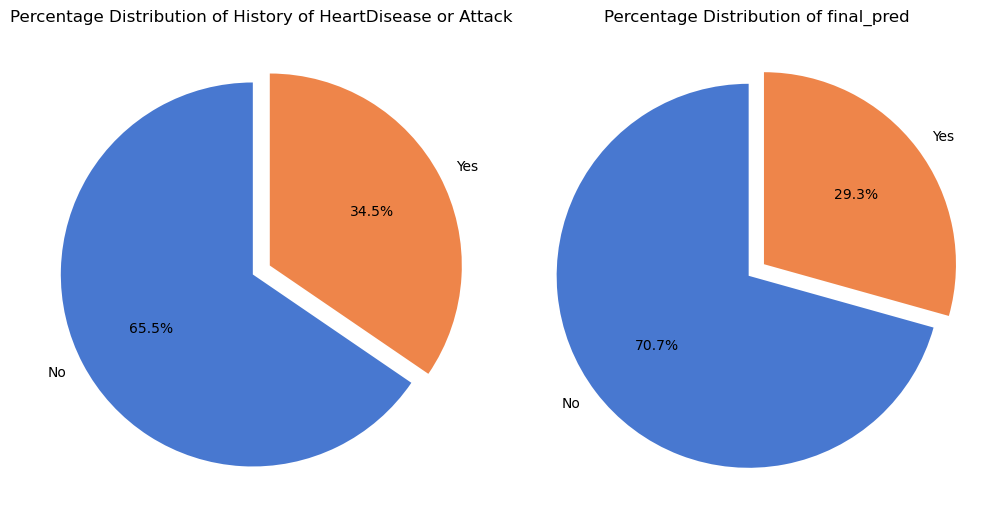

History of HeartDisease or Attack  final_pred
No                                 No            44686
Yes                                Yes           17829
                                   No             7855
No                                 Yes            3991
Name: count, dtype: int64


In [298]:
columns_to_plot = ['History of HeartDisease or Attack','final_pred']
plot_categorical_distributions(columns_to_plot,data=Submission)

In [299]:
weights = rf.feature_importances_

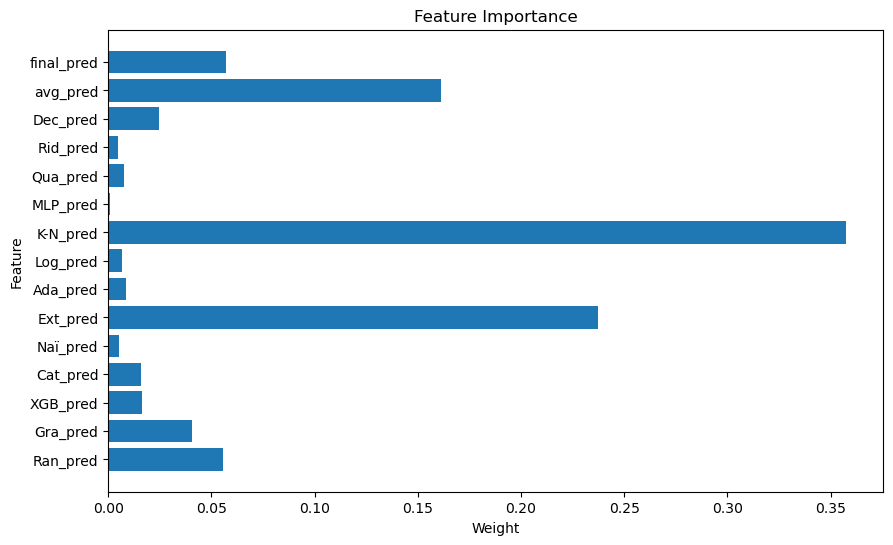

Weights (Coefficients):
Ran_pred: 0.05579801641204124
Gra_pred: 0.04044078968752419
XGB_pred: 0.016195406900381484
Cat_pred: 0.015778440112120953
Naï_pred: 0.005255908489038045
Ext_pred: 0.23714271403469533
Ada_pred: 0.008765399770861798
Log_pred: 0.006626275483339227
K-N_pred: 0.357607095734115
MLP_pred: 0.0009355246692874835
Qua_pred: 0.007666963381949768
Rid_pred: 0.004869482350653144
Dec_pred: 0.024632887635211917
avg_pred: 0.16107093666649275
final_pred: 0.05721415867228782


In [300]:
plt.figure(figsize=(10, 6))
plt.barh(X_Features.columns, weights)
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

print("Weights (Coefficients):")
for feature, weight in zip(X_Features.columns, weights):
  print(f"{feature}: {weight}")

In [301]:
my_submission = Submission.drop("final_pred", axis=1)

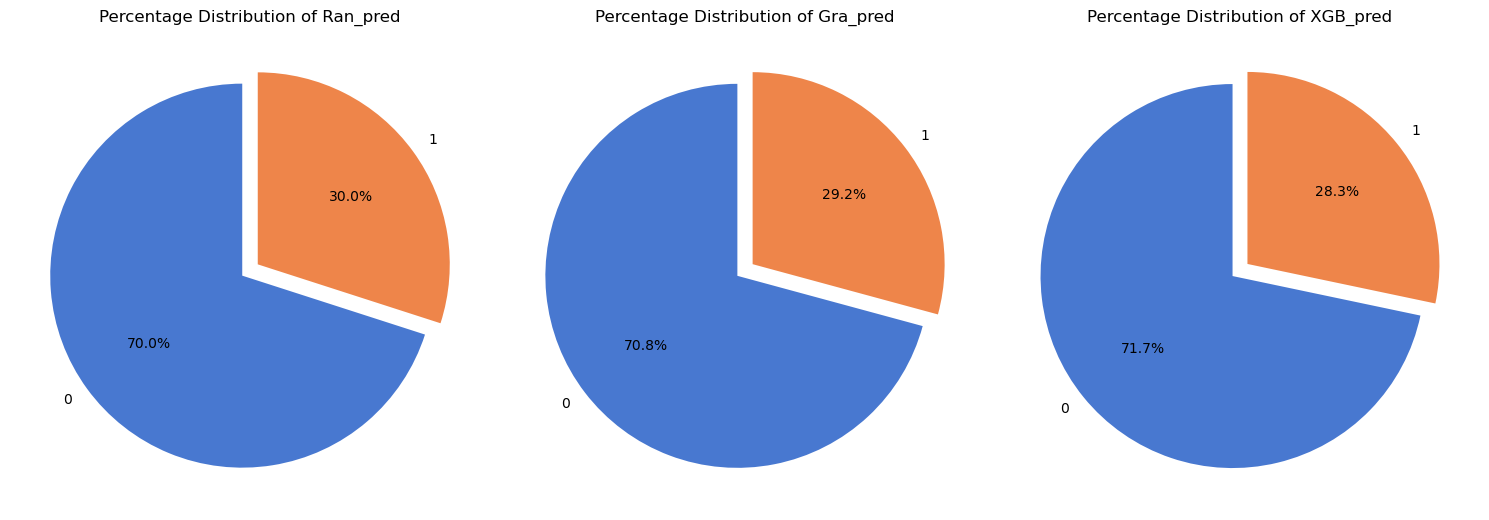

Ran_pred  Gra_pred  XGB_pred
0         0         0           49756
1         1         1           18559
                    0            1674
          0         1            1320
0         1         0            1159
          0         1             832
1         0         0             728
0         1         1             333
Name: count, dtype: int64


In [303]:
model_columns = ['Ran_pred', 'Gra_pred', 'XGB_pred']
plot_categorical_distributions(model_columns,data=final_predict)

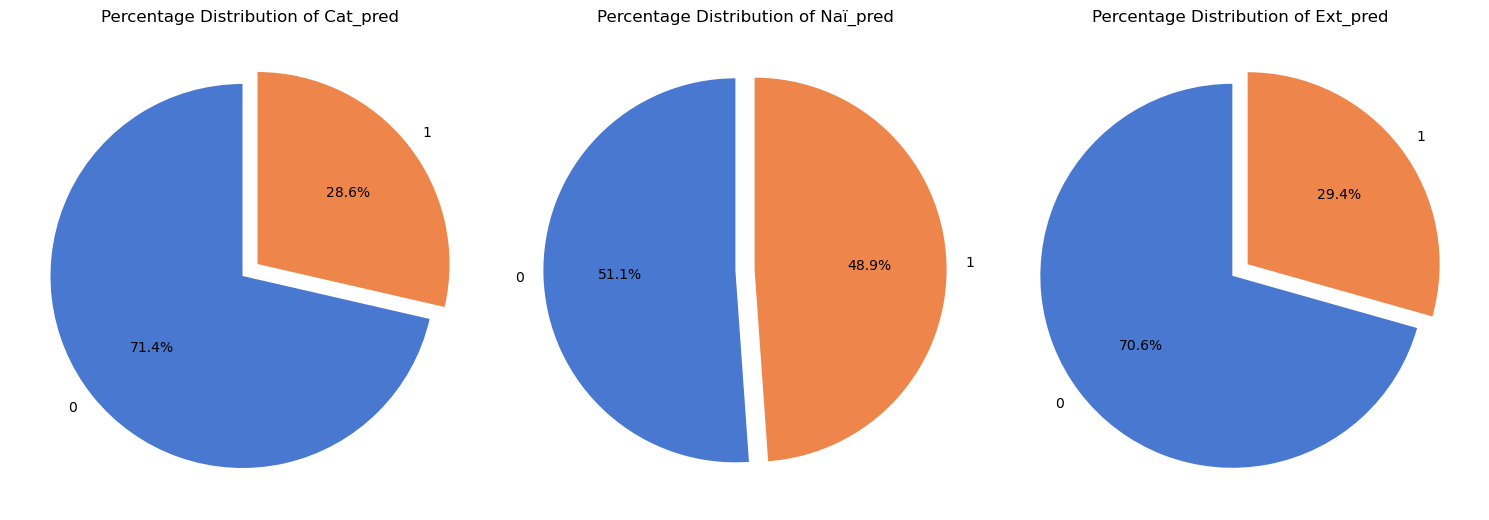

Cat_pred  Naï_pred  Ext_pred
0         0         0           35980
1         1         1           17456
0         1         0           13216
1         1         0            3066
0         1         1            2606
          0         1            1297
1         0         1             493
                    0             247
Name: count, dtype: int64


In [304]:
model_columns = ['Cat_pred', 'Naï_pred', 'Ext_pred']
plot_categorical_distributions(model_columns,data=final_predict)

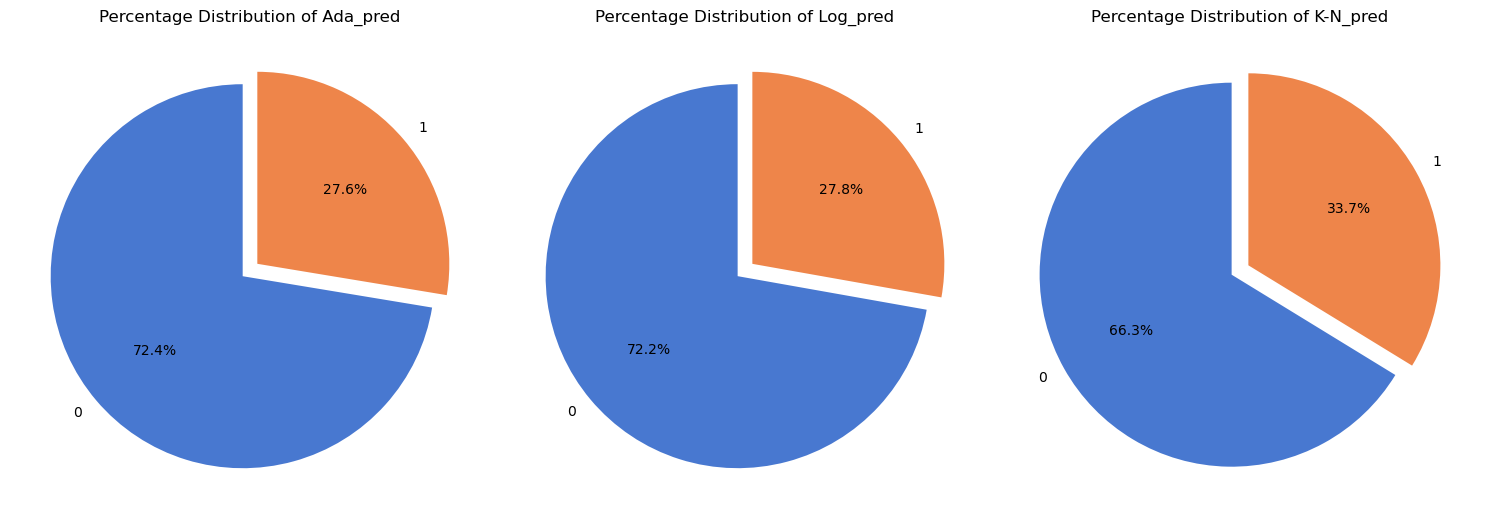

Ada_pred  Log_pred  K-N_pred
0         0         0           43539
1         1         1           14358
0         0         1            7950
1         1         0            3972
          0         1            1570
0         1         1            1218
                    0            1122
1         0         0             632
Name: count, dtype: int64


In [305]:
model_columns = ['Ada_pred', 'Log_pred', 'K-N_pred']
plot_categorical_distributions(model_columns,data=final_predict)

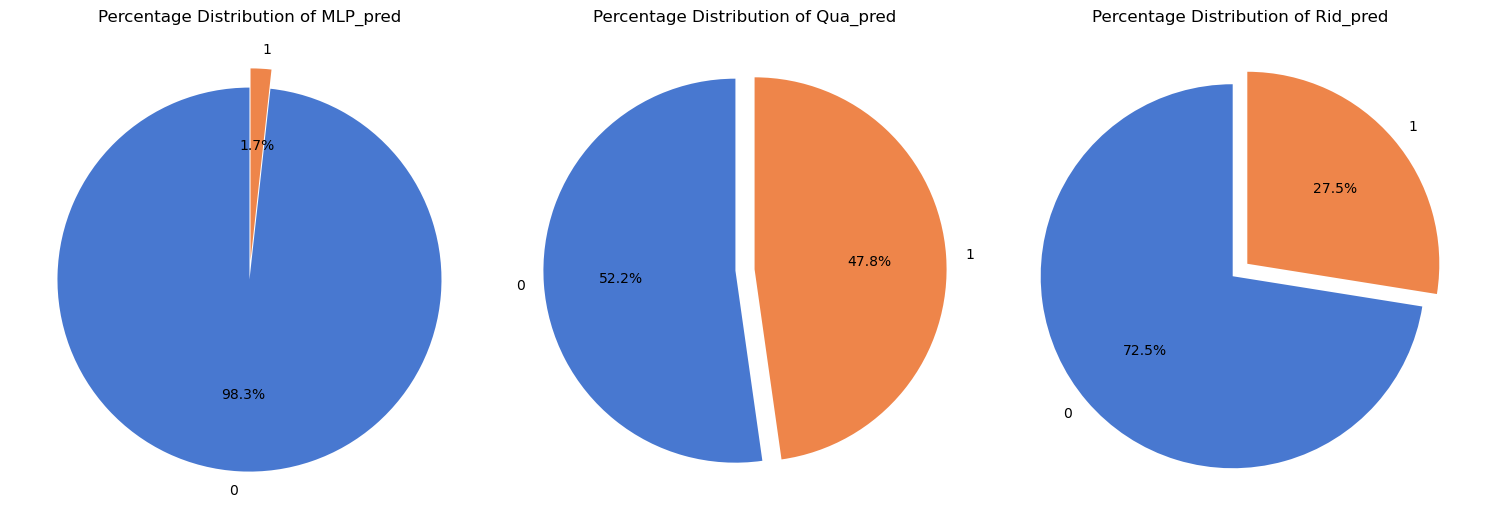

MLP_pred  Qua_pred  Rid_pred
0         0         0           38565
          1         1           18887
                    0           15332
1         1         1            1295
0         0         1             282
Name: count, dtype: int64


In [306]:
model_columns = ['MLP_pred','Qua_pred', 'Rid_pred']
plot_categorical_distributions(model_columns,data=final_predict)

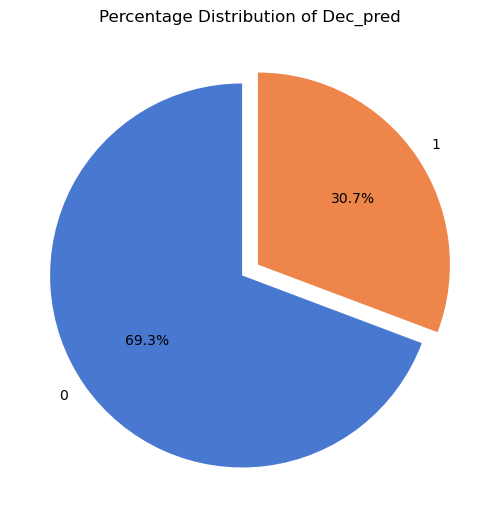

Dec_pred
0           51507
1           22854
Name: count, dtype: int64


In [307]:
model_columns = ['Dec_pred']
plot_categorical_distributions(model_columns,data=final_predict)

In [308]:
my_submission.to_csv("my_submission.csv", index=False)

In [309]:
my_submission.head()

,ID,History of HeartDisease or Attack
0,test_000001,Yes
1,test_000002,Yes
2,test_000003,No
3,test_000004,No
4,test_000005,No
